In [2]:
%load_ext autoreload
%autoreload 2

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import pickle
import os 

sys.path.append("..")

from opdynamics.utils.reading_tools import (parse_experiment_params,
                                            make_tuple,
                                            count_experiment_runs,
                                            get_runs_paths)
from opdynamics.utils.results_tools import get_experiment_mean_data
from opdynamics.utils.plotting.formatting import (classical_structure,
                                                  format_text)

from opdynamics.utils.plotting.plotting import heat_plot

In [4]:
params = parse_experiment_params("../experiments_params/uniform_polarized.json")
results = get_experiment_mean_data(params, "../results/uniform_polarized/")

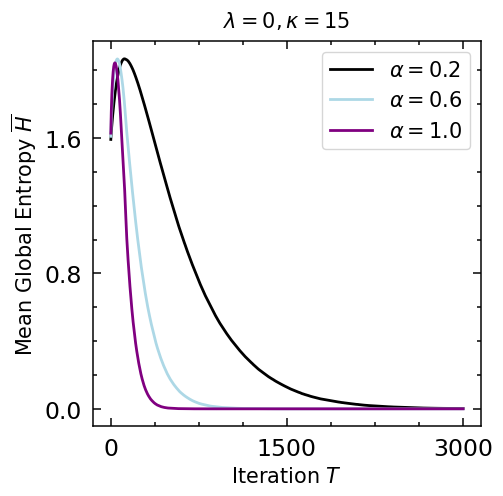

In [5]:
# parameters

nrows = 1
ncols = 1

titles = [
    r"$\lambda = 0, \kappa = 15$",
    r"$\lambda = 0, \kappa = 25$",
    r"$\lambda = 0, \kappa = 30$"
]
title_size = 15
single_ylabel = True
position_ylabel = "left"
ylabel = r"Mean Global Entropy $\overline{H}$"
ylabel_fontsize = 15
xlabel_bottom_only = True
xlabel = r"Iteration $T$"
xlabel_fontsize = 15
axis_width = 1.08
tick_pad = 8
tick_label_size = 17
num_x_ticks = 3
num_y_ticks= 3


fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (5*ncols, 5*nrows))

fig, axs = classical_structure(
    fig,
    axs,
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)

# Text
fig, axs = format_text(
    fig,
    axs,
    titles,
    title_size,
    single_ylabel,
    position_ylabel,
    ylabel,
    ylabel_fontsize,
    xlabel_bottom_only,
    xlabel,
    xlabel_fontsize
)

# plot
line_width = 2

measure = 'entropy'

alpha_color =  {
    1: "purple",
    0.8: "darkgreen",
    0.6: "lightblue",
    0.4: "y",
    0.2: "k"
}

X = np.arange(1, 3000 + 1)

selected_params = [x for x in params if x['kappa'] == 15 and x['lambd'] == 0 and x['gamma'] == 0]
for p in selected_params:
    axs[0].plot(X, results[make_tuple(p, True)][measure], c = alpha_color[p['alpha']], linewidth = line_width, label = rf'$\alpha = ${p["alpha"]}')

axs[0].legend(loc = 'upper right', fontsize = 15)

[Text(0.0, 0, '0'),
 Text(200.0, 0, '200'),
 Text(400.0, 0, '400'),
 Text(600.0, 0, '600'),
 Text(800.0, 0, '800'),
 Text(1000.0, 0, '1000')]

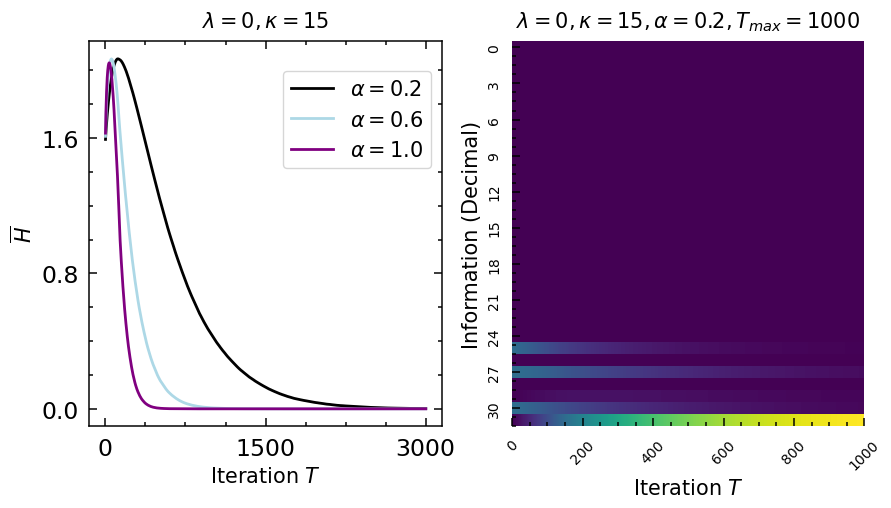

In [18]:
from matplotlib.ticker import MaxNLocator

nrows = 1
ncols = 2

titles = [r"$\lambda = 0, \kappa = 15$", r"$\lambda = 0, \kappa = 15, \alpha = 0.2, T_{max} = 1000$"]
title_size = 15
single_ylabel = True
position_ylabel = "left"
ylabel = ""
ylabel_fontsize = 15
xlabel_bottom_only = True
xlabel = ""
xlabel_fontsize = 15
axis_width = 1.08
tick_pad = 8
tick_label_size = 17
num_x_ticks = 3
num_y_ticks= 3


fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (5*ncols, 5*nrows))
fig, axs = classical_structure(
    fig,
    axs,
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)
fig, axs = format_text(
    fig,
    axs,
    titles,
    title_size,
    single_ylabel,
    position_ylabel,
    ylabel,
    ylabel_fontsize,
    xlabel_bottom_only,
    xlabel,
    xlabel_fontsize
)

# *************
    
# plot
line_width = 2

measure = 'entropy'

alpha_color =  {
    1: "purple",
    0.8: "darkgreen",
    0.6: "lightblue",
    0.4: "y",
    0.2: "k"
}

X = np.arange(1, 3000 + 1)


selected_params = [x for x in params if x['kappa'] == 15 and x['lambd'] == 0 and x['gamma'] == 0]
for p in selected_params:
    axs[0].plot(X, results[make_tuple(p, True)][measure], c = alpha_color[p['alpha']], linewidth = line_width, label = rf"$\alpha = {p['alpha']}$")
axs[0].legend(loc = 'upper right', fontsize = 15, bbox_to_anchor = (1, 0.95))


axs[0].set_ylabel(r"$\overline{H}$")
axs[0].set_xlabel(r"Iteration $T$")




param = selected_params = [x for x in params if x['kappa'] == 15 and x['lambd'] == 0 and x['alpha'] == 0.2].pop()
data = results[make_tuple(param, True)]
_, ax = heat_plot(data['distribution'][:, :1000], cmap = 'viridis', fig = fig, ax = axs[1])

axs[1].set_ylabel("Information (Decimal)")
axs[1].set_xlabel(r"Iteration $T$")

axs[1].tick_params(
    which = 'both',
    top = False,
    right = False,
    labelsize = 10
)

axs[1].xaxis.set_major_locator(MaxNLocator(5))
new_tick_locations = axs[1].get_xticks()
ticks = [int(x) for x in new_tick_locations]
axs[1].set_xticks(new_tick_locations)
axs[1].set_xticklabels(ticks, rotation = 45)

In [14]:
data["distribution"][:, :1000].shape

(32, 1000)